In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames_housing = pd.read_csv("data/ames_housing_no_missing.csv")
features_of_interest = [
    "LotFrontage",
    "LotArea",
    "PoolArea",
    "YearBuilt",
    "YrSold",    
]
target_name = "SalePrice"
data, target = (
    ames_housing[features_of_interest],
    ames_housing[target_name]
)
data.shape, target.shape

((1460, 5), (1460,))

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

linear_regression = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=False, include_bias=False),
    LinearRegression()
).set_output(transform="pandas")
cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    return_estimator=True,
    return_train_score=True,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [7]:
cv_results['train_score'] = -cv_results['train_score']
cv_results['test_score'] = -cv_results['test_score']
print(f"Train Mean: {cv_results['train_score'].mean():.2e}, Std: {cv_results['train_score'].std():.2e}")
print(f"Test Mean: {cv_results['test_score'].mean():.2e}, Std: {cv_results['test_score'].std():.2e}")

Train Mean: 2.85e+09, Std: 8.68e+07
Test Mean: 8.69e+10, Std: 2.47e+11


In [13]:
cv_results['estimator']

[Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('linearregression', LinearRegression())]),
 Pipel

In [17]:
feature_names = cv_results['estimator'][0][-1].feature_names_in_
coefs = [est[-1].coef_ for est in cv_results['estimator']]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)
weights_linear_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            10 non-null     float64
 1   LotArea                10 non-null     float64
 2   PoolArea               10 non-null     float64
 3   YearBuilt              10 non-null     float64
 4   YrSold                 10 non-null     float64
 5   LotFrontage^2          10 non-null     float64
 6   LotFrontage LotArea    10 non-null     float64
 7   LotFrontage PoolArea   10 non-null     float64
 8   LotFrontage YearBuilt  10 non-null     float64
 9   LotFrontage YrSold     10 non-null     float64
 10  LotArea^2              10 non-null     float64
 11  LotArea PoolArea       10 non-null     float64
 12  LotArea YearBuilt      10 non-null     float64
 13  LotArea YrSold         10 non-null     float64
 14  PoolArea^2             10 non-null     float64
 15  PoolArea 

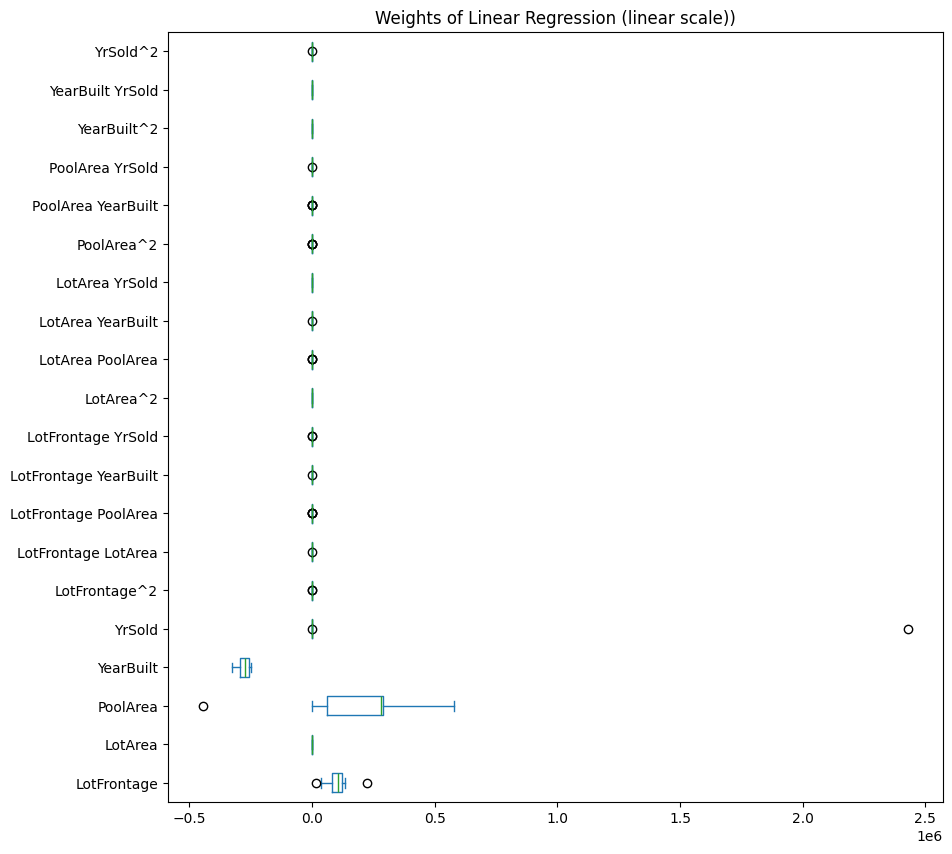

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(vert=False, ax=ax)
_ = ax.set_title("Weights of Linear Regression (linear scale))")

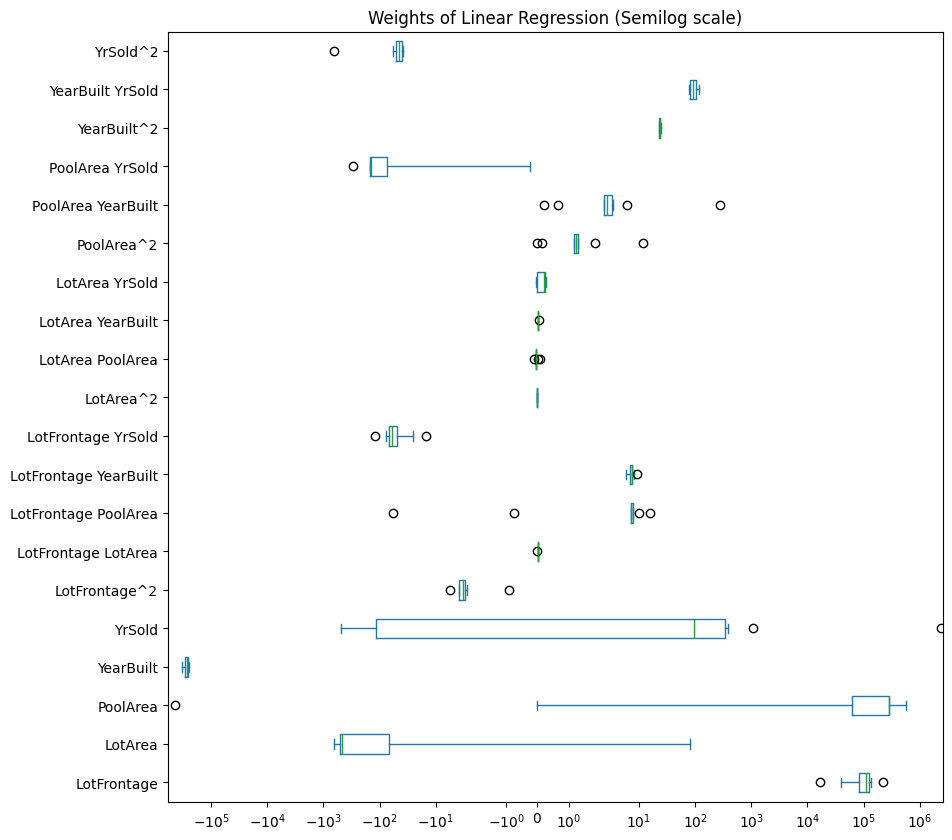

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(vert=False, ax=ax)
_ = ax.set(
    title="Weights of Linear Regression (Semilog scale)",
    xscale="symlog"
)

In [27]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=False, include_bias=False),
    Ridge(alpha=100, solver='cholesky')
)
cv_results_ridge = cross_validate(
    ridge,
    data,
    target,
    cv=10,
    return_estimator=True,
    return_train_score=True,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [28]:
cv_results_ridge['train_score'] = -cv_results_ridge['train_score']
cv_results_ridge['test_score'] = -cv_results_ridge['test_score']
print(f"Train Mean: {cv_results_ridge['train_score'].mean():.2e}, Std: {cv_results_ridge['train_score'].std():.2e}")
print(f"Test Mean: {cv_results_ridge['test_score'].mean():.2e}, Std: {cv_results_ridge['test_score'].std():.2e}")

Train Mean: 2.89e+09, Std: 8.90e+07
Test Mean: 4.46e+10, Std: 1.20e+11


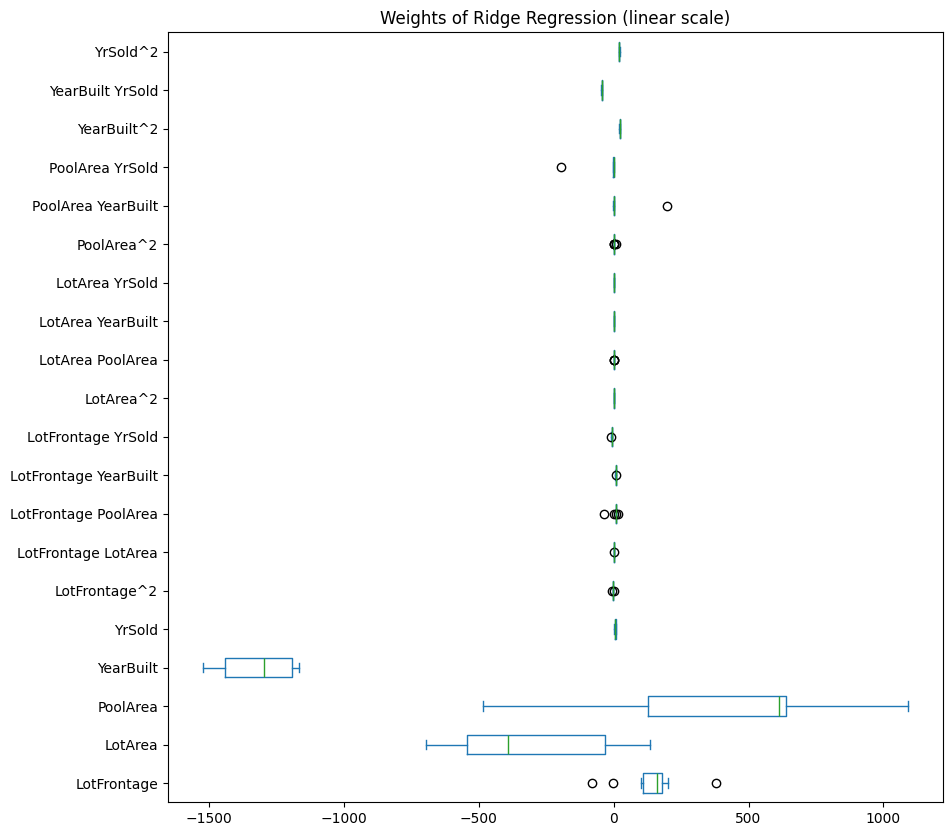

In [35]:
coefs_ridge = [est[-1].coef_ for est in cv_results_ridge['estimator']]
weights_ridge = pd.DataFrame(coefs_ridge, columns=feature_names)
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge.plot.box(vert=False, ax=ax)
_ = ax.set(
    title="Weights of Ridge Regression (linear scale)",
)

In [32]:
# Scale input features before regression
from sklearn.preprocessing import MinMaxScaler

scaled_ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, interaction_only=False, include_bias=False),
    Ridge(alpha=10, solver='cholesky')
)

cv_results_scaled_ridge = cross_validate(
    scaled_ridge,
    data,
    target,
    cv=10,
    return_estimator=True,
    return_train_score=True,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)
cv_results_scaled_ridge['train_score'] = -cv_results_scaled_ridge['train_score']
cv_results_scaled_ridge['test_score'] = -cv_results_scaled_ridge['test_score']
print(f"Train Mean: {cv_results_scaled_ridge['train_score'].mean():.2e}, Std: {cv_results_scaled_ridge['train_score'].std():.2e}")
print(f"Test Mean: {cv_results_scaled_ridge['test_score'].mean():.2e}, Std: {cv_results_scaled_ridge['test_score'].std():.2e}")

Train Mean: 3.78e+09, Std: 1.21e+08
Test Mean: 3.83e+09, Std: 1.17e+09


<Axes: >

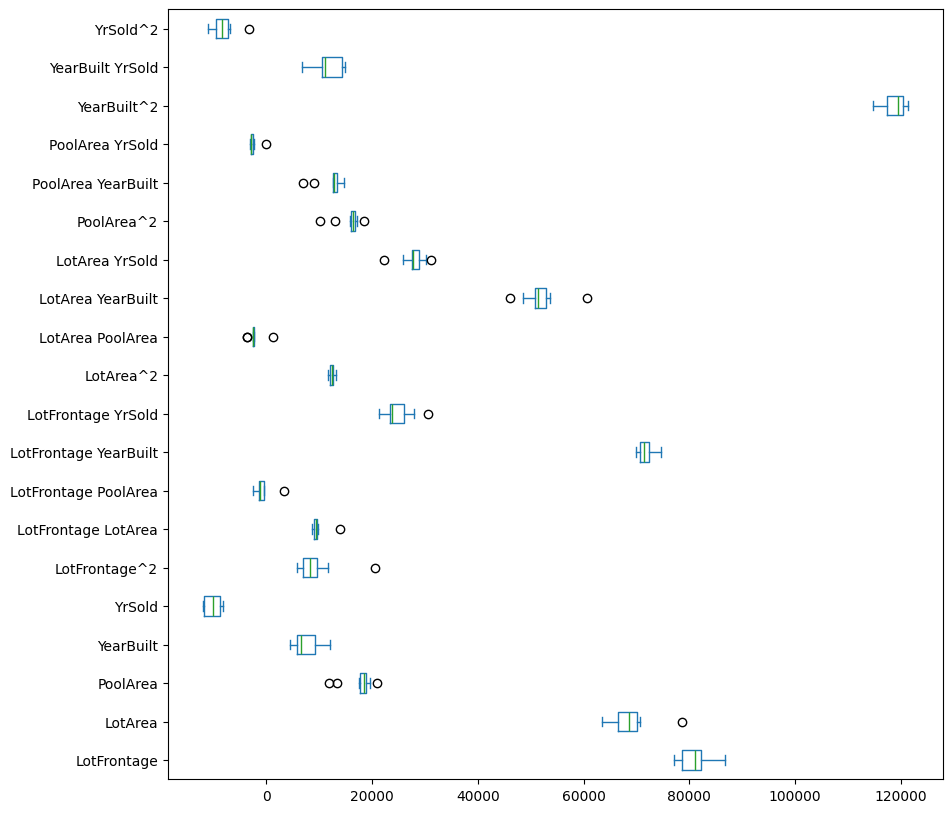

In [37]:
coefs_scaled_ridge = [est[-1].coef_ for est in cv_results_scaled_ridge['estimator']]
weights_scaled_ridge = pd.DataFrame(coefs_scaled_ridge, columns=feature_names)
fig, ax = plt.subplots(figsize=(10, 10))
weights_scaled_ridge.plot.box(vert=False, ax=ax)

In [38]:
# Try extreme regularization
ridge_extreme = make_pipeline(
    MinMaxScaler(),
    Ridge(alpha=1e6, solver='cholesky')
)
cv_results_extreme_ridge = cross_validate(
    ridge_extreme,
    data,
    target,
    cv=10,
    return_estimator=True,
    return_train_score=True,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)
cv_results_extreme_ridge['train_score'] = -cv_results_extreme_ridge['train_score']
cv_results_extreme_ridge['test_score'] = -cv_results_extreme_ridge['test_score']
print(f"Train Mean: {cv_results_extreme_ridge['train_score'].mean():.2e}, Std: {cv_results_extreme_ridge['train_score'].std():.2e}")
print(f"Test Mean: {cv_results_extreme_ridge['test_score'].mean():.2e}, Std: {cv_results_extreme_ridge['test_score'].std():.2e}")

Train Mean: 6.31e+09, Std: 1.54e+08
Test Mean: 6.31e+09, Std: 1.39e+09


In [52]:
# Tune hyperparameter (alpha) using cross-validation
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-7, 5, num=100)
ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, interaction_only=False, include_bias=False),
    RidgeCV(alphas=alphas, store_cv_results=True)
)

In [55]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
cv_ridge_shuffled = cross_validate(
    ridge, data, target, cv=cv,
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True,
    n_jobs=-1
)

In [67]:
train_scores = -cv_ridge_shuffled['train_score']
test_scores = -cv_ridge_shuffled['test_score']
print(f"Train Mean: {train_scores.mean():.2e}, Std: {train_scores.std():.2e}")
print(f"Test Mean: {test_scores.mean():.2e}, Std: {test_scores.std():.2e}")

Train Mean: 3.14e+09, Std: 2.11e+08
Test Mean: 3.32e+09, Std: 9.14e+08


<Axes: >

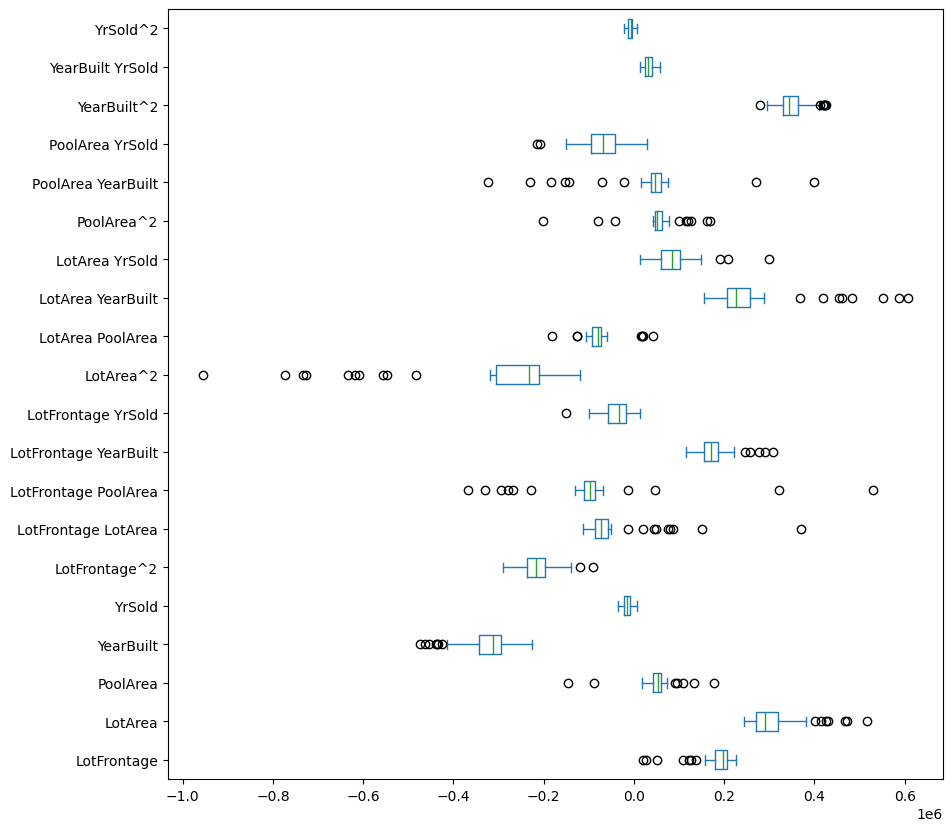

In [ ]:
coefs_ridge = [est[-1].coef_ for est in cv_ridge_shuffled['estimator']]
weights_ridge = pd.DataFrame(coefs_ridge, columns=feature_names)
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge.plot.box(vert=False, ax=ax)
_ = ax.set(
    title="Weights of Ridge Regression (linear scale)",
)

In [60]:
mse_alphas = [
    est[-1].cv_results_.mean(axis=0) for est in cv_ridge_shuffled['estimator']
]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas =cv_alphas.aggregate(['mean', 'std']).T
cv_alphas

,mean,std
1.000000e-07,1.863174e+10,3.190118e+10
1.321941e-07,1.862424e+10,3.187346e+10
1.747528e-07,1.861434e+10,3.183688e+10
2.310130e-07,1.860129e+10,3.178865e+10
3.053856e-07,1.858410e+10,3.172512e+10
...,...,...
3.274549e+04,6.347767e+09,2.671982e+08
4.328761e+04,6.352728e+09,2.673336e+08
5.722368e+04,6.356493e+09,2.674364e+08
7.564633e+04,6.359348e+09,2.675144e+08


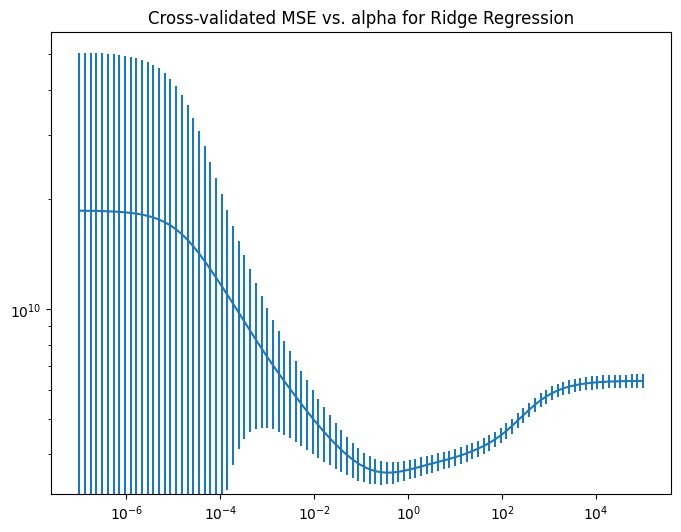

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(
    cv_alphas.index,
    cv_alphas['mean'],
    yerr=cv_alphas['std'],
)
_ = ax.set(
    xscale='log',
    yscale='log',
    title="Cross-validated MSE vs. alpha for Ridge Regression"
)

In [66]:
best_alphas = [ est[-1].alpha_ for est in cv_ridge_shuffled['estimator']]
np.min(best_alphas), np.max(best_alphas)

(np.float64(0.037649358067924715), np.float64(0.6135907273413176))

In [69]:
# Exercise M4.04
penguins = pd.read_csv("data/penguins_classification.csv")
penguins = (
    penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
)

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [70]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(
    penguins, random_state=0, test_size=0.4
)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [71]:
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model):
    model.fit(data_train, target_train)
    accuracy = model.score(data_test, target_test)
    C = model.get_params()["logisticregression__C"]

    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="pcolormesh",
        cmap="RdBu_r",
        alpha=0.8,
        vmin=0.0,
        vmax=1.0,
    )
    DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="contour",
        linestyles="--",
        linewidths=1,
        alpha=0.8,
        levels=[0.5],
        ax=disp.ax_,
    )
    sns.scatterplot(
        data=penguins_train,
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        palette=["tab:blue", "tab:red"],
        ax=disp.ax_,
    )
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())

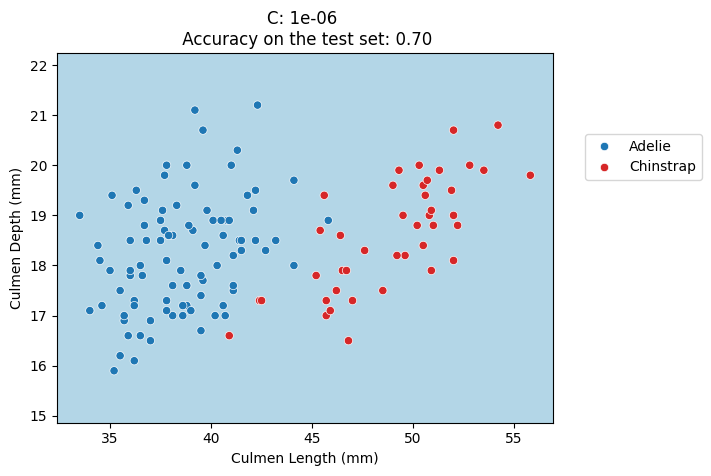

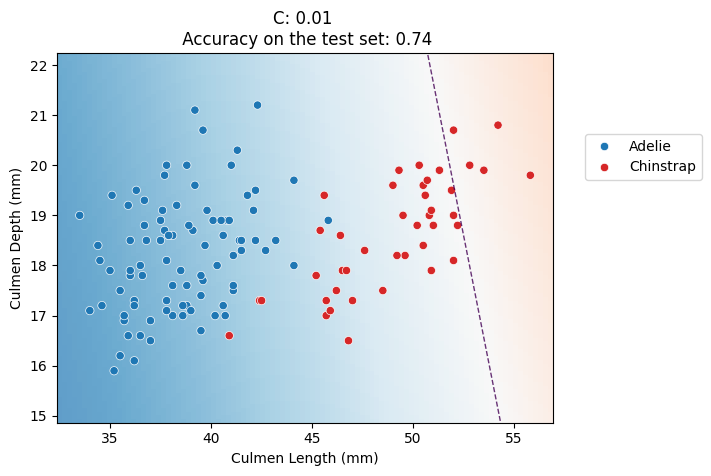

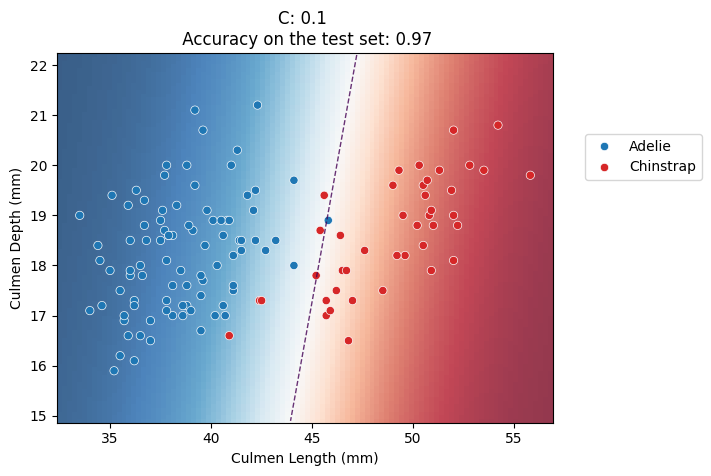

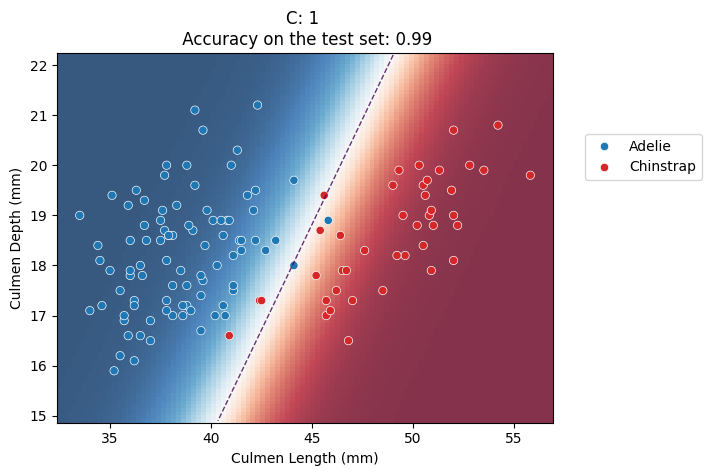

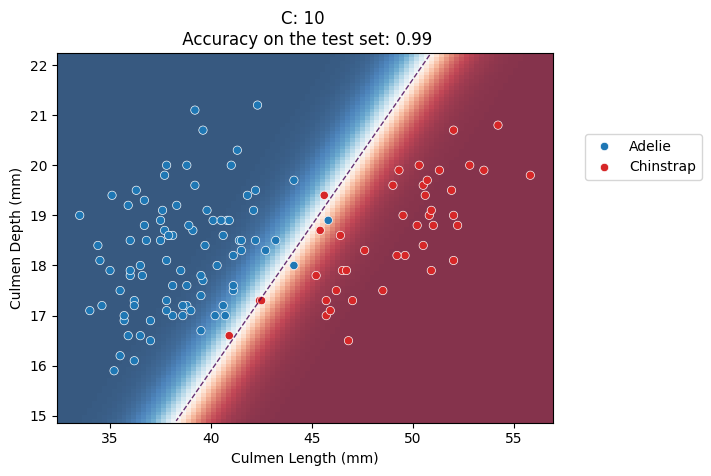

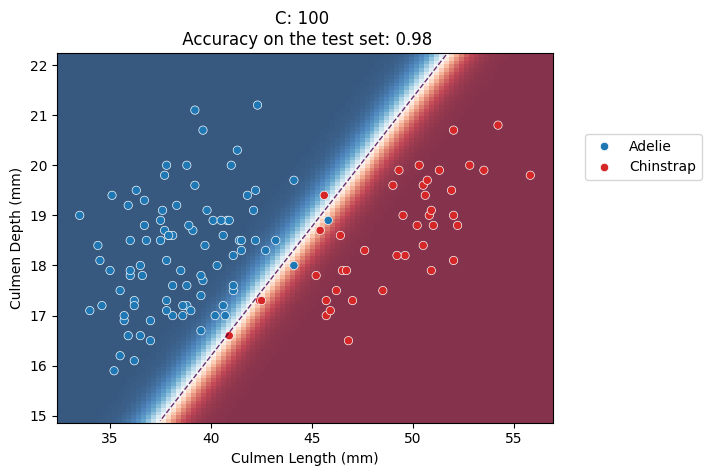

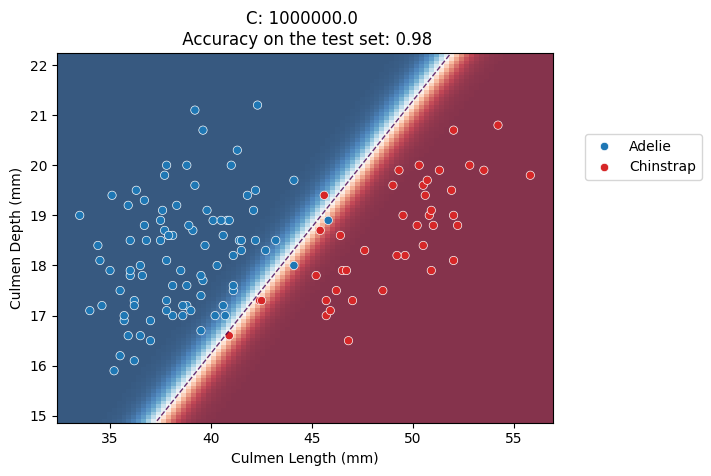

In [73]:
# Plot decision boundary versus C value
Cs = [1e-6, 0.01, 0.1, 1, 10, 100, 1e6]
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    plot_decision_boundary(logistic_regression)


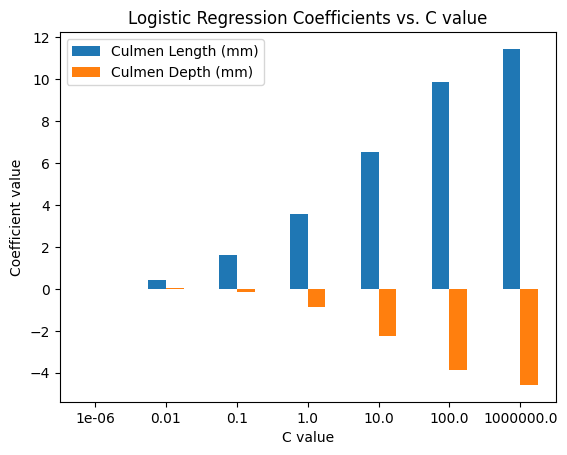

In [82]:
# Examine the impact of the C parameter on the magnitude of the coefficients
import numpy as np

# Put all coefs in a list
coefs_list = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_
    coefs_list.append(coefs)

# Transform the list into a DataFrame for easier plotting
coefs_df = pd.DataFrame(np.vstack(coefs_list), columns=culmen_columns, index=Cs)

# Plot two sets of bars
ax = coefs_df.plot.bar(rot=0)
_ = ax.set(
    xlabel="C value",
    ylabel="Coefficient value",
    title="Logistic Regression Coefficients vs. C value",
)

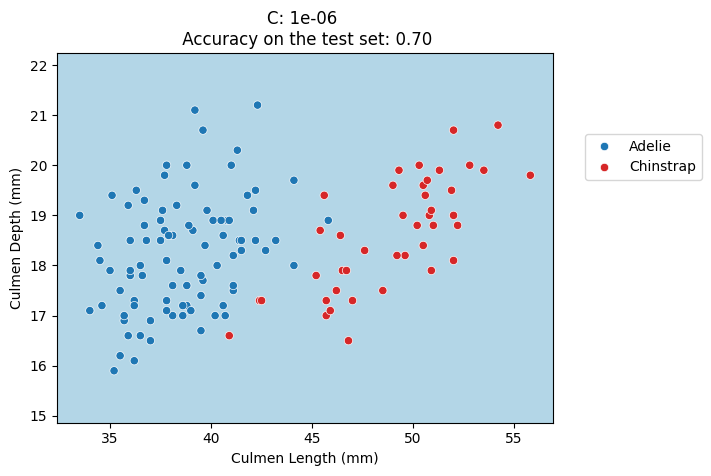

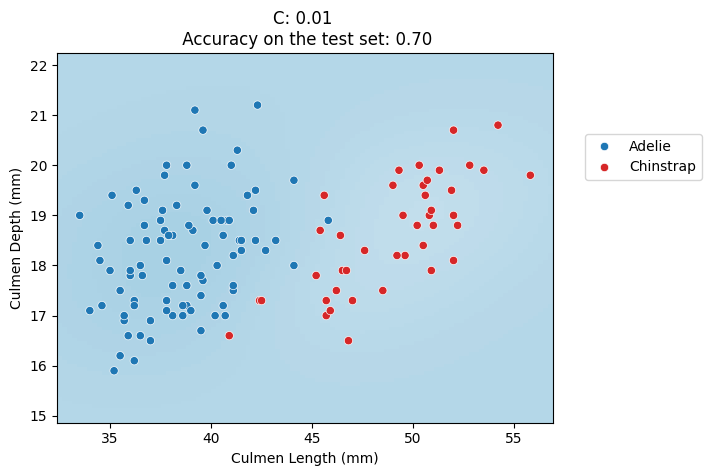

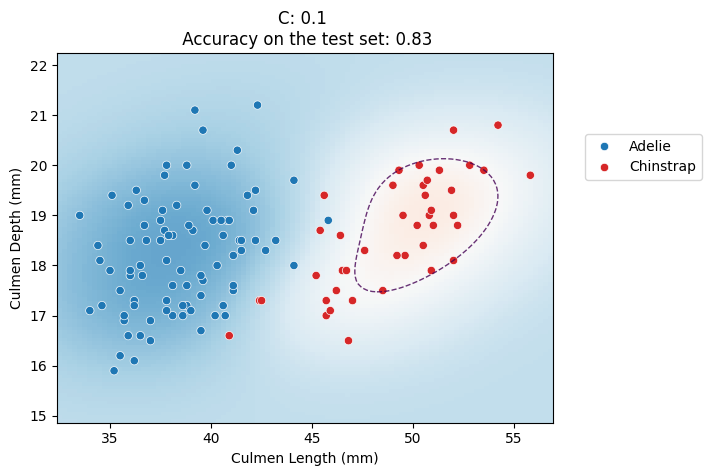

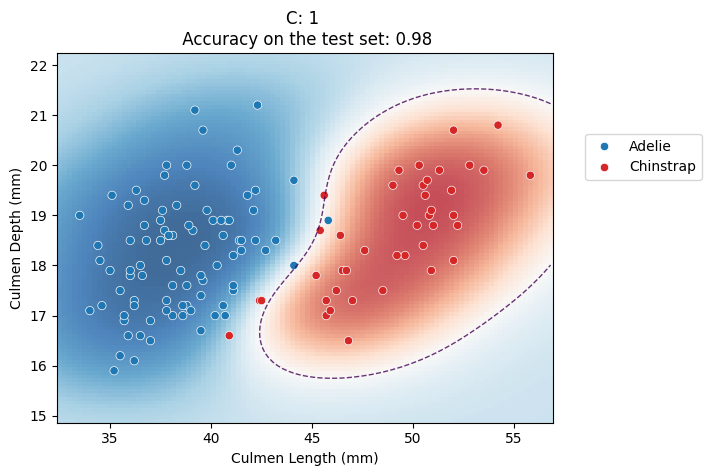

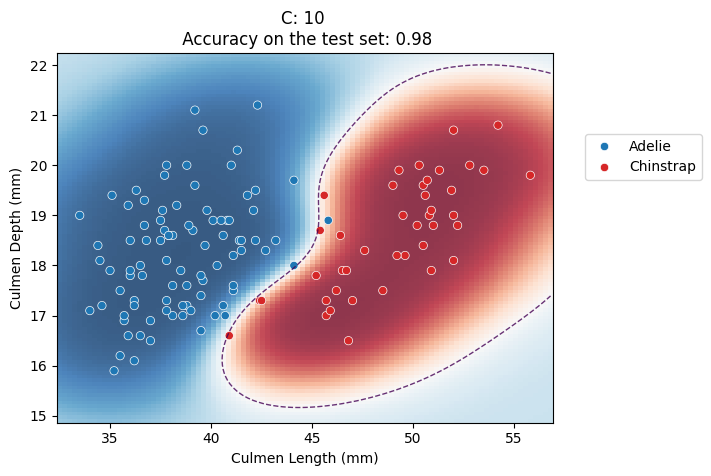

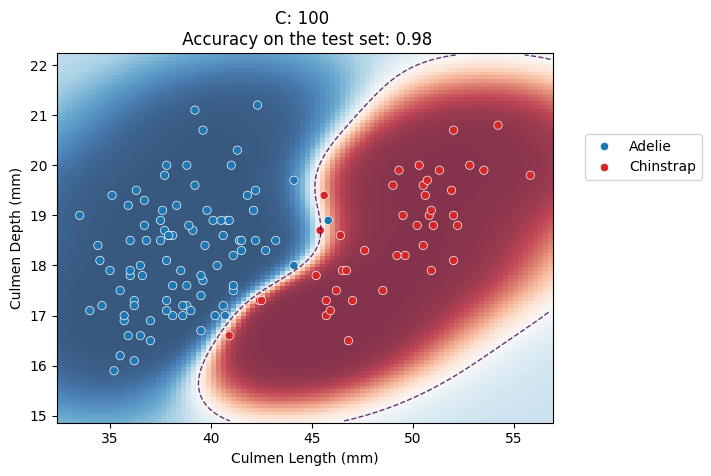

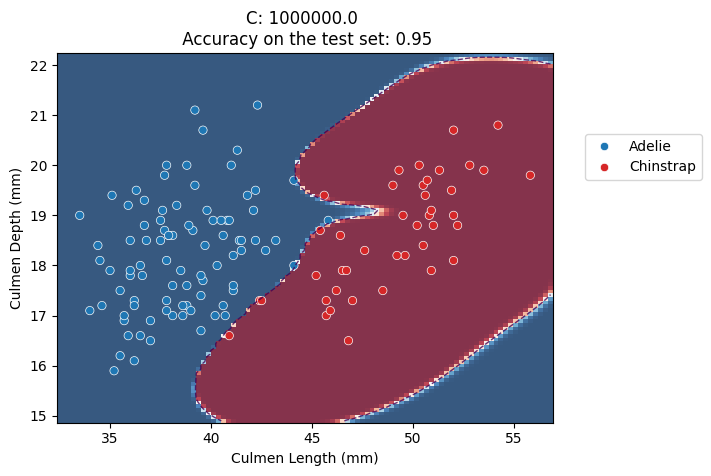

In [83]:
# Add a nonlinear feature transformation, Nystroem
from sklearn.kernel_approximation import Nystroem
logistic_regression = make_pipeline(
    StandardScaler(),
    Nystroem(kernel='rbf', gamma=1.0, n_components=100, random_state=0),
    LogisticRegression()
)
# Plot decision boundary versus C value
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    plot_decision_boundary(logistic_regression)

In [110]:
# Final Module Quiz 4
import pandas as pd

ames_housing = pd.read_csv("data/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [111]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [112]:
# Set up a Ridge regression pipeline (with no regularizaton)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

ridge_regression0 = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0.0)
)

cv_ridge0 = cross_validate(
    ridge_regression0,
    data_numerical,
    target,
    cv=10,    
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True
)


c:\ESL\Learning\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\ESL\Learning\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


<Axes: >

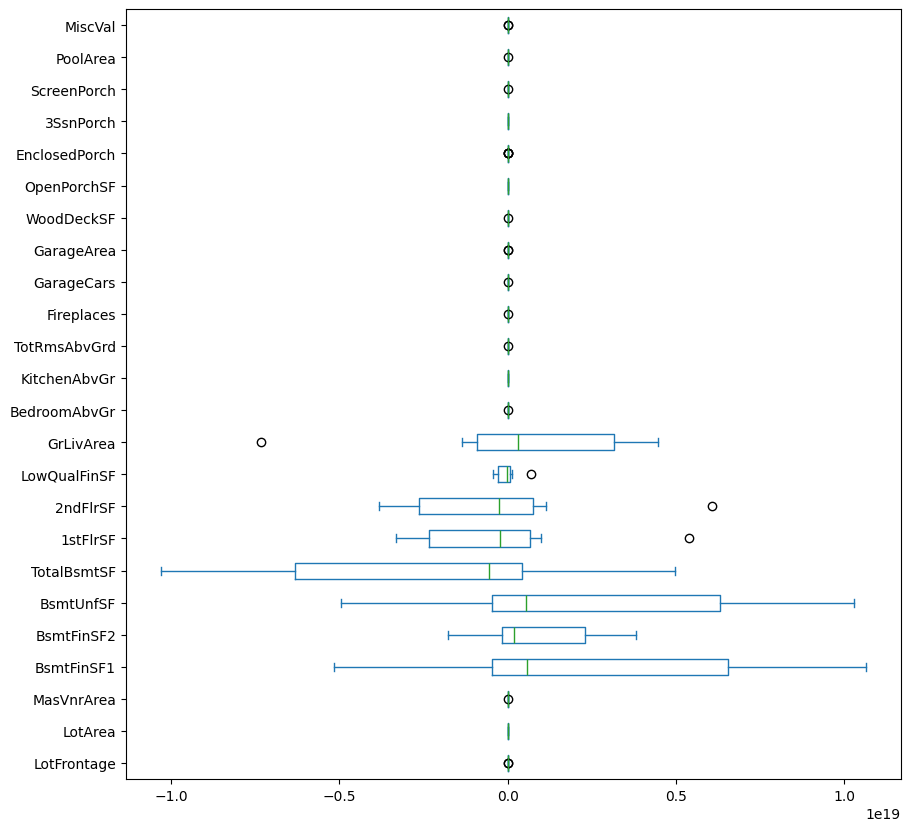

In [113]:
feature_names = data_numerical.columns
coefs_ridge0 = [est[-1].coef_ for est in cv_ridge0['estimator']]
weights_ridge0 = pd.DataFrame(coefs_ridge0, columns=feature_names)
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge0.plot.box(vert=False, ax=ax)

In [114]:
# Rank features by their absolute coefficient values
mean_abs_weights = weights_ridge0.abs().mean().sort_values(ascending=False)
mean_abs_weights

BsmtFinSF1       4.023029e+18
BsmtUnfSF        3.891378e+18
TotalBsmtSF      3.872505e+18
GrLivArea        2.493295e+18
2ndFlrSF         2.080829e+18
1stFlrSF         1.835289e+18
BsmtFinSF2       1.417463e+18
LowQualFinSF     2.342330e+17
GarageCars       2.040492e+04
TotRmsAbvGrd     1.276757e+04
BedroomAbvGr     1.232350e+04
KitchenAbvGr     1.077223e+04
MasVnrArea       6.754349e+03
WoodDeckSF       4.650353e+03
Fireplaces       3.710124e+03
GarageArea       2.850381e+03
EnclosedPorch    2.565171e+03
OpenPorchSF      2.030178e+03
PoolArea         1.963923e+03
LotArea          1.940467e+03
ScreenPorch      1.532386e+03
3SsnPorch        1.138142e+03
LotFrontage      9.954883e+02
MiscVal          3.818978e+02
dtype: float64

In [115]:
ridge_regression1 = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

cv_ridge1 = cross_validate(
    ridge_regression1,
    data_numerical,
    target,
    cv=10,    
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True
)

coefs_ridge1 = [est[-1].coef_ for est in cv_ridge1['estimator']]
weights_ridge1 = pd.DataFrame(coefs_ridge1, columns=feature_names)
mean_abs_weights = weights_ridge1.abs().mean().sort_values(ascending=False)
mean_abs_weights

GarageCars       19417.910189
GrLivArea        17119.540942
2ndFlrSF         12201.988699
TotRmsAbvGrd     12152.055864
BedroomAbvGr     12117.822236
TotalBsmtSF      11947.838543
KitchenAbvGr     10791.538866
1stFlrSF          9701.912155
BsmtFinSF1        8574.144931
MasVnrArea        6862.664154
WoodDeckSF        4763.085964
Fireplaces        3087.058747
BsmtUnfSF         3078.259716
EnclosedPorch     2735.318700
OpenPorchSF       2095.684415
PoolArea          1778.852121
LowQualFinSF      1718.353818
GarageArea        1714.838363
ScreenPorch       1634.099935
LotArea           1508.092126
3SsnPorch          943.744522
LotFrontage        660.816462
MiscVal            358.624461
BsmtFinSF2         353.776625
dtype: float64

<Axes: >

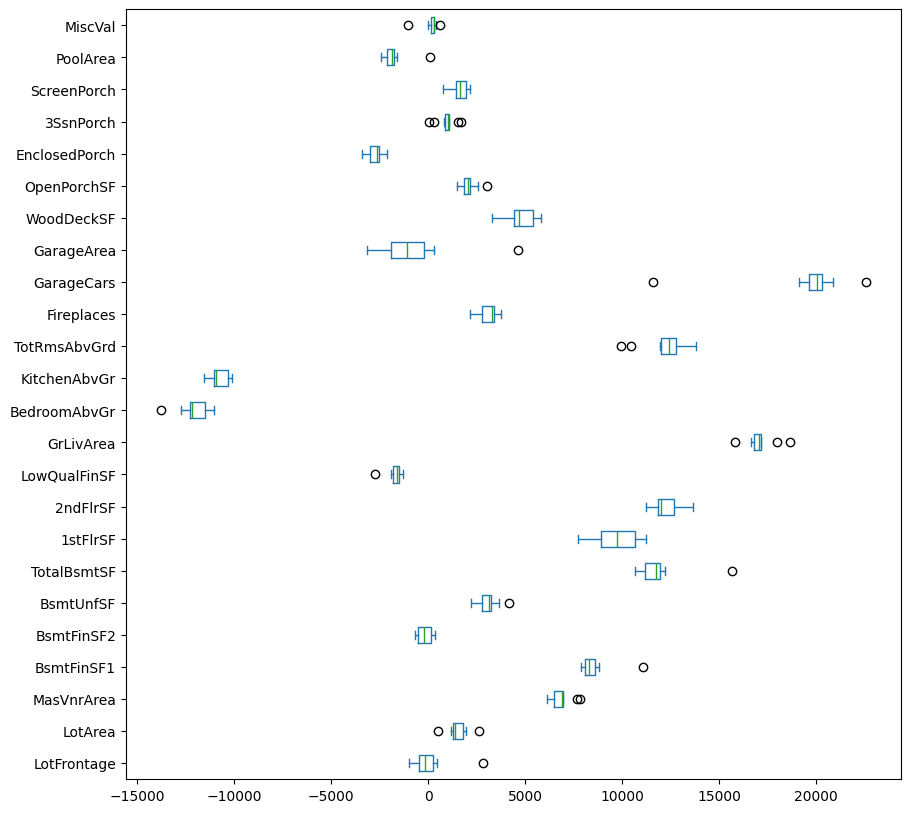

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge1.plot.box(vert=False, ax=ax)

In [117]:
numerical_features2 = numerical_features.copy()
numerical_features2.remove("GarageCars")
data_numerical2 = data[numerical_features2]

In [126]:
cv_ridge2 = cross_validate(
    ridge_regression1,
    data_numerical2,
    target,
    cv=10,    
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True
)
feature_names2 = data_numerical2.columns
coefs_ridge2 = [est[-1].coef_ for est in cv_ridge2['estimator']]
weights_ridge2 = pd.DataFrame(coefs_ridge2, columns=feature_names2)
mean_abs_weights2 = weights_ridge2.abs().mean().sort_values(ascending=False)
mean_abs_weights2

GrLivArea        17237.286614
GarageArea       15612.205136
TotRmsAbvGrd     13545.724177
BedroomAbvGr     12754.921273
2ndFlrSF         12726.256607
TotalBsmtSF      12044.765893
KitchenAbvGr     10824.812014
1stFlrSF          9367.725302
BsmtFinSF1        8069.141940
MasVnrArea        7139.398070
WoodDeckSF        5084.159513
Fireplaces        4294.302027
BsmtUnfSF         3756.729551
EnclosedPorch     3608.396495
LowQualFinSF      2502.673045
PoolArea          2314.014096
OpenPorchSF       1675.388209
ScreenPorch       1583.997808
LotArea           1303.240547
3SsnPorch         1055.237938
LotFrontage        912.281327
BsmtFinSF2         448.354781
MiscVal            309.023799
dtype: float64

<Axes: >

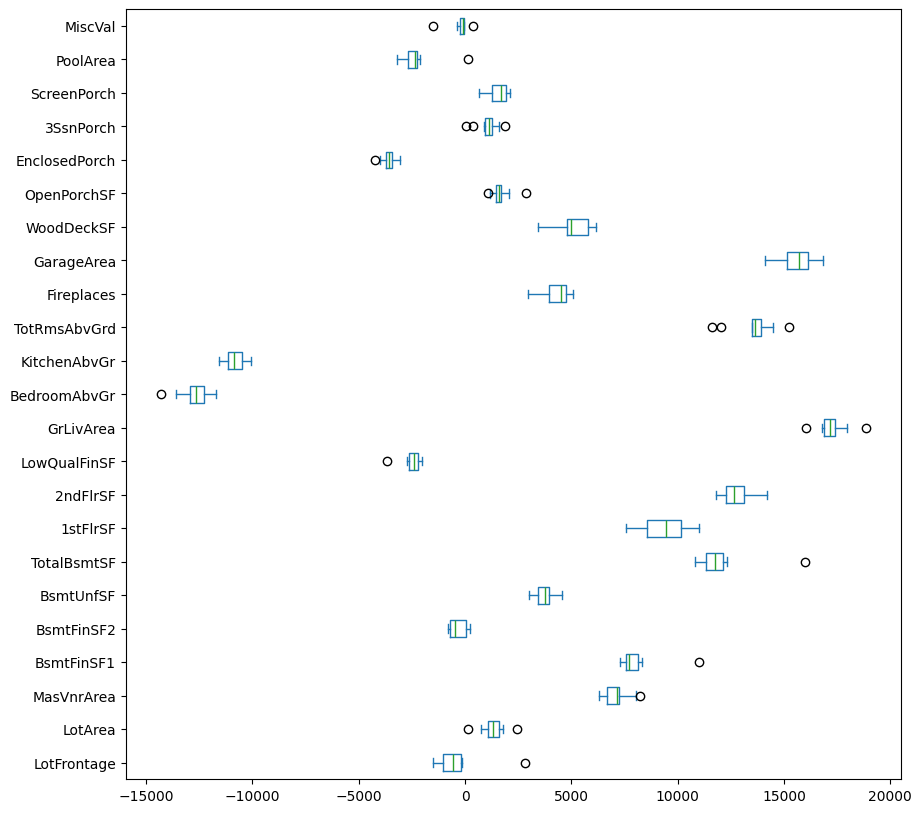

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge2.plot.box(vert=False, ax=ax)

<Axes: >

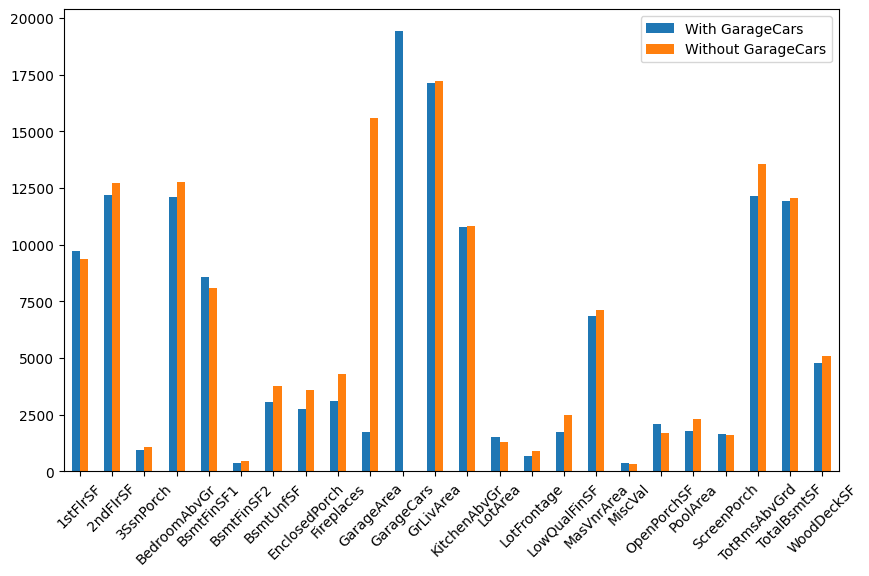

In [119]:
# Compare mean_abs_weights and mean_abs_weights2
weights_comparison = pd.DataFrame({
    "With GarageCars": mean_abs_weights,
    "Without GarageCars": mean_abs_weights2
})
weights_comparison.plot.bar(rot=45, figsize=(10, 6))

<Axes: >

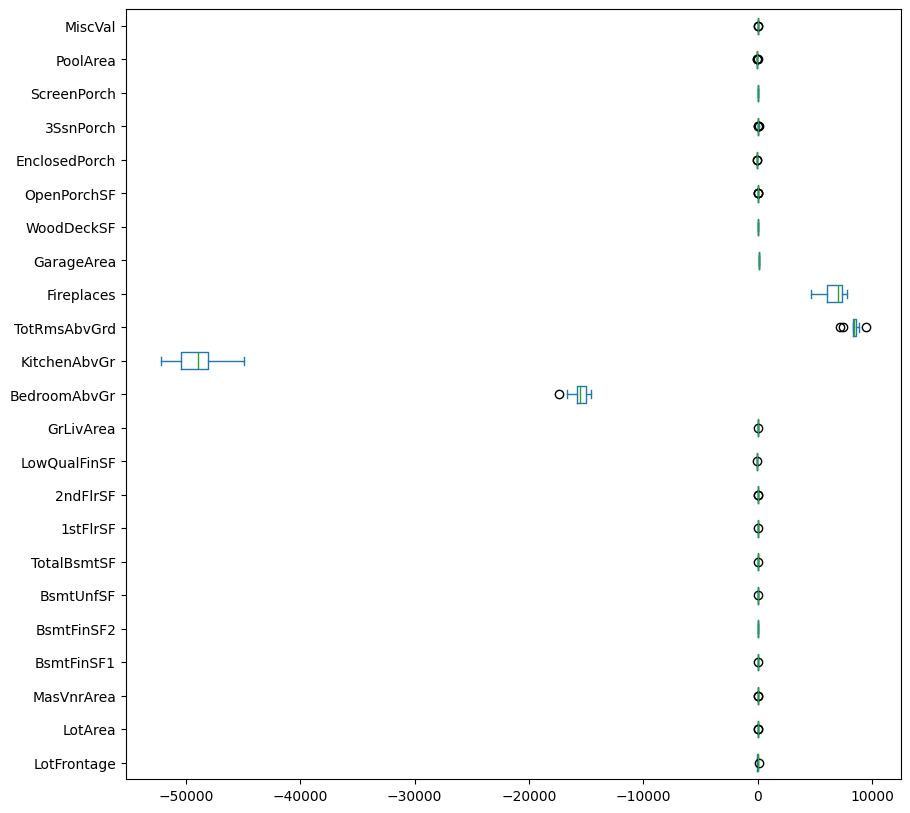

In [124]:
# Search for the optimal alpha using RidgeCV
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 101)
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=10)

# Nested cross-validation to evaluate the model with optimal alpha
from sklearn.model_selection import cross_validate
cv_ridge_cv = cross_validate(
    ridge_cv,
    data_numerical2,
    target,
    cv=10,
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True
)

coefs_ridge_cv = [est.coef_ for est in cv_ridge_cv['estimator']]
weights_ridge_cv = pd.DataFrame(coefs_ridge_cv, columns=feature_names2)
weights_ridge_cv.plot.box(vert=False, figsize=(10, 10))

In [129]:
best_alphas = [est.alpha_ for est in cv_ridge_cv['estimator']]
np.min(best_alphas), np.max(best_alphas)

(np.float64(0.001), np.float64(1.1481536214968828))

In [135]:
# Get categorical features from the dataset
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# List of all features
all_features = numerical_features + categorical_features

# OneHot encode categorical features and combine with numerical features
data_encoded = pd.get_dummies(data[categorical_features], drop_first=True)
data_all = pd.concat([data[numerical_features], data_encoded], axis=1)

In [136]:
# Refit the RidgeCV model with all features
ridge_cv_full = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=10)
ridge_cv_full = cross_validate(
    ridge_cv_full,
    data_all,
    target,
    cv=10,
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True
)

In [137]:
test_score_full = -ridge_cv_full['test_score']
test_score_numerical2 = -cv_ridge_cv['test_score']
# concatenate the two test scores in a DataFrame
test_scores_comparison = pd.DataFrame({
    "All Features": test_score_full,
    "Numerical Features without GarageCars": test_score_numerical2
})
test_scores_comparison['Difference'] = test_scores_comparison['All Features'] - test_scores_comparison['Numerical Features without GarageCars']
test_scores_comparison

,All Features,Numerical Features without GarageCars,Difference
0,4.678434e+08,1.067155e+09,-5.993117e+08
1,7.343808e+08,1.266704e+09,-5.323229e+08
2,7.948066e+08,1.264844e+09,-4.700377e+08
3,1.598283e+09,2.322142e+09,-7.238585e+08
4,1.080039e+09,1.930774e+09,-8.507354e+08
5,7.302108e+08,1.224329e+09,-4.941181e+08
6,6.742712e+08,1.307230e+09,-6.329591e+08
7,6.894807e+08,1.464878e+09,-7.753973e+08
8,3.623887e+09,6.056252e+09,-2.432365e+09
9,5.953007e+08,1.236990e+09,-6.416894e+08


In [138]:
# Reconstruct the pipeline with SplineTransformer nad then Nystroem
from sklearn.preprocessing import SplineTransformer
from sklearn.kernel_approximation import Nystroem
ridge_regression_spline = make_pipeline(
    SplineTransformer(degree=3, n_knots=5, include_bias=False),
    Nystroem(kernel='poly', degree=2, n_components=300, random_state=0),
    RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=10)
)
cv_ridge_cv = cross_validate(
    ridge_regression_spline,
    data_all,
    target,
    cv=10,
    scoring='neg_mean_squared_error',
    return_estimator=True,
    return_train_score=True
)   

test_score_spline = -cv_ridge_cv['test_score']
# concatenate the two test scores in a DataFrame
test_scores_comparison = pd.DataFrame({
    "Spline": test_score_spline,
    "All Features": test_score_full,
})
test_scores_comparison['Difference'] = test_scores_comparison['Spline'] - test_scores_comparison['All Features']
test_scores_comparison

,Spline,All Features,Difference
0,4.563488e+08,4.678434e+08,-1.149463e+07
1,7.084911e+08,7.343808e+08,-2.588971e+07
2,5.646276e+08,7.948066e+08,-2.301790e+08
3,1.356210e+09,1.598283e+09,-2.420731e+08
4,1.187298e+09,1.080039e+09,1.072590e+08
5,6.151105e+08,7.302108e+08,-1.151003e+08
6,5.422751e+08,6.742712e+08,-1.319961e+08
7,6.063915e+08,6.894807e+08,-8.308914e+07
8,1.769275e+09,3.623887e+09,-1.854612e+09
9,5.401590e+08,5.953007e+08,-5.514167e+07
